# Vẫn là Naive Bayes, nhưng dùng sklearn!

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import re, string
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parsing(sentence : str) -> tuple:
    sentence_class = int(sentence[0].strip())
    sentence = sentence[1:].strip()

    punctuations = '[{0}]'.format(string.punctuation)

    sentence = sentence.lower()
    sentence = re.sub('\w*\d\w*', '', sentence)
    sentence = re.sub(punctuations, '', sentence)

    return (sentence, sentence_class)

In [3]:
with open('data/TREC.train.all', 'r+') as f:
    train_sentences, train_classes = [], []
    for line in f.readlines():
        sentence, sentence_class = parsing(line.strip().lower())
        train_sentences.append(sentence)
        train_classes.append(sentence_class)


with open('data/TREC.test.all', 'r+') as f:
    test_sentences, test_classes = [], []
    for line in f.readlines():
        sentence, sentence_class = parsing(line.lower().strip())
        test_sentences.append(sentence)
        test_classes.append(sentence_class)

In [4]:
print(len(train_sentences), len(train_classes))
print(len(test_sentences), len(test_classes))

5452 5452
500 500


In [5]:
vectorizer = TfidfVectorizer()
Xvector_train = vectorizer.fit_transform(train_sentences)

Xvector_test = vectorizer.transform(test_sentences)

## Multinomial NB

In [6]:
multinomial_nb_model = MultinomialNB()
multinomial_nb_model.fit(Xvector_train, train_classes)

MultinomialNB()

In [7]:
multinomial_nb_model.score(Xvector_test, test_classes)

0.768

In [8]:
predicted_multinomial_nb = multinomial_nb_model.predict(Xvector_test)
print(classification_report(test_classes, predicted_multinomial_nb, zero_division = 0))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       138
           1       0.58      0.66      0.62        94
           2       0.00      0.00      0.00         9
           3       0.68      1.00      0.81        65
           4       0.88      0.74      0.81        81
           5       0.98      0.78      0.87       113

    accuracy                           0.77       500
   macro avg       0.65      0.66      0.65       500
weighted avg       0.78      0.77      0.76       500



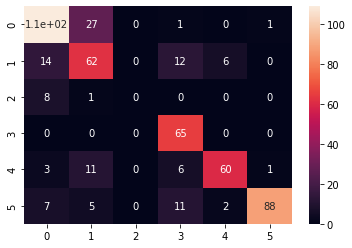

In [9]:
nb_cm = confusion_matrix(test_classes, predicted_multinomial_nb)
sns.heatmap(nb_cm, annot = True)
plt.show()

In [10]:
print(accuracy_score(test_classes, predicted_multinomial_nb))

0.768


## Bernoulli NB

In [11]:
bernoulli_nb_model = BernoulliNB()
bernoulli_nb_model.fit(Xvector_train, train_classes)

BernoulliNB()

In [12]:
predicted_bernoulli_nb = bernoulli_nb_model.predict(Xvector_test)
print(classification_report(predicted_bernoulli_nb, test_classes, zero_division = 0))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76       210
           1       0.66      0.54      0.59       115
           2       0.00      0.00      0.00         0
           3       0.89      0.73      0.81        79
           4       0.54      0.90      0.68        49
           5       0.41      0.98      0.57        47

    accuracy                           0.69       500
   macro avg       0.58      0.63      0.57       500
weighted avg       0.79      0.69      0.71       500



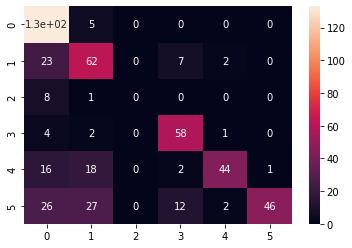

In [13]:
bernoulli_nb_cm = confusion_matrix(test_classes, predicted_bernoulli_nb)
sns.heatmap(bernoulli_nb_cm, annot = True)
plt.show()

In [14]:
print(accuracy_score(predicted_bernoulli_nb, test_classes))

0.686
